# FINANCIAL ASSETS RETURNS AND VOLATILITIES

In this notebook we will conduct an analysis of the returns and volatilities of a financial asset, exploring different measures and their interpretation. First, we will calculate percentage and logarithmic returns, assessing how they differ in their behaviour and their practical use in financial analysis. Next, we will explore distributions of returns to identify patterns and possible deviations from a normal distribution.

In addition, we will study volatility, commonly used as a measure of risk, and discuss how it can be used to assess the uncertainty associated with future asset returns.

Translated with DeepL.com (free version)

## 1. Profitability and its distribution

In [2]:
import yfinance as yf

data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [3]:
data

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31 00:00:00+00:00,37.707062,121.250000,95.926308,228.166245
2019-01-02 00:00:00+00:00,37.750088,121.330002,95.501335,228.403625
2019-01-03 00:00:00+00:00,33.989883,122.430000,91.988045,222.953339
2019-01-04 00:00:00+00:00,35.440895,121.440002,96.266335,230.421265
2019-01-07 00:00:00+00:00,35.362022,121.860001,96.389091,232.238083
...,...,...,...,...
2023-12-22 00:00:00+00:00,192.868134,190.270004,372.543915,469.225250
2023-12-26 00:00:00+00:00,192.320221,191.720001,372.623505,471.206543
2023-12-27 00:00:00+00:00,192.419830,192.589996,372.036713,472.058533


In [4]:
# Convertir el índice a formato de fecha sin la información de horas y minutos
data.index = data.index.date

data

Ticker,AAPL,GLD,MSFT,SPY
2018-12-31,37.707062,121.250000,95.926308,228.166245
2019-01-02,37.750088,121.330002,95.501335,228.403625
2019-01-03,33.989883,122.430000,91.988045,222.953339
2019-01-04,35.440895,121.440002,96.266335,230.421265
2019-01-07,35.362022,121.860001,96.389091,232.238083
...,...,...,...,...
2023-12-22,192.868134,190.270004,372.543915,469.225250
2023-12-26,192.320221,191.720001,372.623505,471.206543
2023-12-27,192.419830,192.589996,372.036713,472.058533
2023-12-28,192.848206,191.470001,373.240112,472.236847


**Logarithmic return**. This is the return used to perform profitability analysis.

The time series of financial asset prices is usually modelled as a **log-normal distribution**, since prices cannot be negative and tend to grow multiplicatively. Under this model, the **logarithms of prices follow a normal distribution**, which facilitates the analysis and statistical modelling of returns.

Ref.: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

The most important reasons are:
* When the variation in price is small, logarithmic returns are very similar to arithmetic returns.
* $log(\frac{p_{d+1}}{p_{d}})$ follows a normal distribution.
* $log(\frac{p_{d+1}}{p_{d}})=log(p_{d+1})-log(p_{d})$
* Addition is numerically more stable than multiplication when the numbers are very small.

### Using Numpy

Numpy is a library also widely used to process data.
It is very similar to Pandas.

The main use we are going to give it is to calculate the logarithmic return of assets.

In [5]:
import numpy as np

rentabilidad_log = np.log(data).diff().dropna()
rentabilidad_log

Ticker,AAPL,GLD,MSFT,SPY
2019-01-02,0.001140,0.000660,-0.004440,0.001040
2019-01-03,-0.104925,0.009025,-0.037482,-0.024152
2019-01-04,0.041803,-0.008119,0.045460,0.032947
2019-01-07,-0.002228,0.003453,0.001274,0.007854
2019-01-08,0.018884,-0.002712,0.007224,0.009351
...,...,...,...,...
2023-12-22,-0.005563,0.004425,0.002780,0.002008
2023-12-26,-0.002845,0.007592,0.000214,0.004214
2023-12-27,0.000518,0.004528,-0.001576,0.001806
2023-12-28,0.002224,-0.005832,0.003229,0.000378


In [7]:
import matplotlib.pyplot as plt

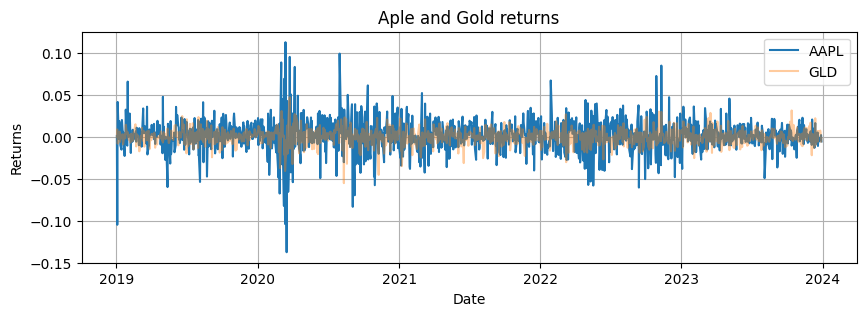

In [22]:
plt.figure(figsize=(10,3))
plt.plot(rentabilidad_log["AAPL"], label="AAPL")
plt.plot(rentabilidad_log["GLD"], label="GLD", alpha=0.4)
plt.grid(True)
plt.title("Aple and Gold returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

**General formula for cumulative profitability using log returns:**

   $$
   R_{\text{acumulada}, t} = \sum_{i=1}^{t} r_i 
   $$

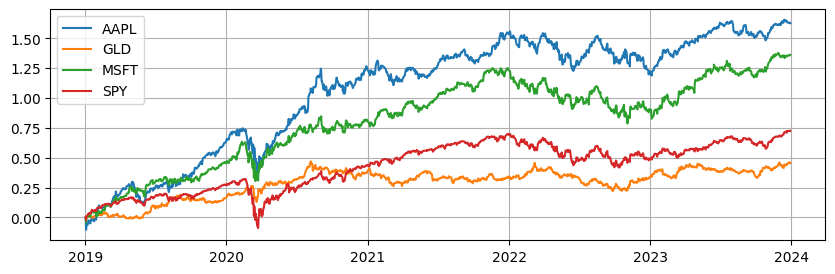

In [156]:
rentabilidad_acum_log = rentabilidad_log.cumsum()

plt.figure(figsize=(10, 3))
plt.plot(rentabilidad_acum_log, label=rentabilidad_acum_log.columns)
plt.grid(True)
plt.legend()
plt.show()

Now let's look at the distribution of asset returns.

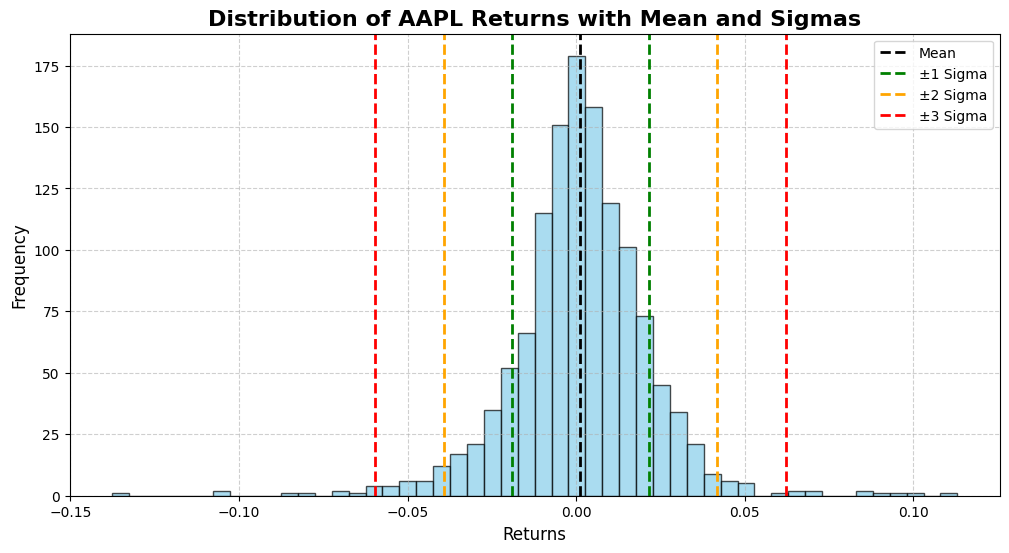

In [24]:
# Recalculate standard deviation and mean
sigma_aapl = rentabilidad_log["AAPL"].std()
media_aapl = rentabilidad_log["AAPL"].mean()

# Create the figure
plt.figure(figsize=(12, 6))
plt.hist(rentabilidad_log["AAPL"], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Media line
plt.axvline(media_aapl, color="black", linestyle="--", label='Mean', linewidth=2)

# +- 1 sigma
plt.axvline(media_aapl + 1 * sigma_aapl, color="green", linestyle="--", label='±1 Sigma', linewidth=2)
plt.axvline(media_aapl - 1 * sigma_aapl, color="green", linestyle="--", linewidth=2)

# +- 2 sigma
plt.axvline(media_aapl + 2 * sigma_aapl, color="orange", linestyle="--", label='±2 Sigma', linewidth=2)
plt.axvline(media_aapl - 2 * sigma_aapl, color="orange", linestyle="--", linewidth=2)

# +- 3 sigma
plt.axvline(media_aapl + 3 * sigma_aapl, color="red", linestyle="--", label='±3 Sigma', linewidth=2)
plt.axvline(media_aapl - 3 * sigma_aapl, color="red", linestyle="--", linewidth=2)

# Titles and labels
plt.title("Distribution of AAPL Returns with Mean and Sigmas", fontsize=16, weight='bold')
plt.xlabel("Returns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show the plot
plt.show()

Looking at the figure, it apparently follows a Normal (Gaussian) distribution. Then, we can characterise the data by its mean and standard deviation:

1. We calculate the average return of the returns:

$$\bar{r} = \frac{1}{n} \sum_{i=1}^n r_i$$

2. Calculate the variance of the returns:

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2$$

Calculate the standard deviation of the returns:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}$$

The return, variance and standard deviation **are always expressed in annual terms**:

- If the data are daily, we consider 252 trading days per year.
- If the data are monthly, we consider that there are 12 months per year.

In [16]:
print(f'Average annualised return: {rentabilidad_log["AAPL"].mean() * 252:.4f}')
print(f'Annualised variance: {rentabilidad_log["AAPL"].var() * 252:.4f}')
print(f'Annualised standard deviation: {rentabilidad_log["AAPL"].std() * np.sqrt(252):.4f}')

Average annualised return: 0.3258
Annualised variance: 0.1039
Annualised standard deviation: 0.3224


WE CAN CALCULATE AND PLOT ANNUAL RETURNS AND VOLATILITIES FOR EACH OF THE ASSETS

In [159]:
# Rentabilidad anualizada.
rentabilidad_log.mean() * 252

Ticker
AAPL    0.325841
GLD     0.091206
MSFT    0.272566
SPY     0.145132
dtype: float64

In [160]:
# Desviación estándar anualizada.
rentabilidad_log.std() * np.sqrt(252)

Ticker
AAPL    0.322368
GLD     0.149444
MSFT    0.304932
SPY     0.210744
dtype: float64

We plot average return and risk.

Refs.:
* Subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.subplots.html#matplotlib.figure.Figure.subplots
* Bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

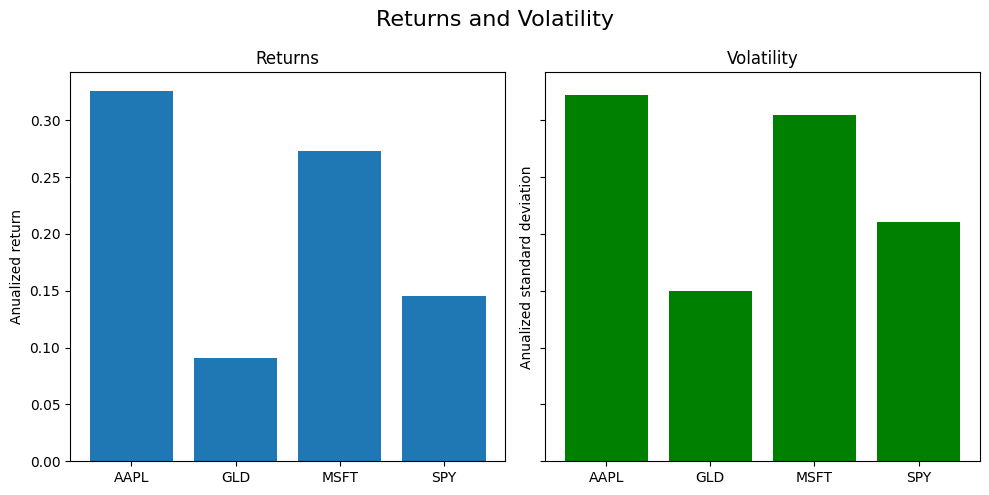

In [17]:
import matplotlib.pyplot as plt

# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = rentabilidad_log.mean() * 252
stds = rentabilidad_log.std() * np.sqrt(252)

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel("Anualized return")
axes[0].set_title("Returns")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values, color="green")
axes[1].set_ylabel("Anualized standard deviation")
axes[1].set_title("Volatility")

# Añadir un título general a la figura
plt.suptitle("Returns and Volatility", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Return distributions.

Ref.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

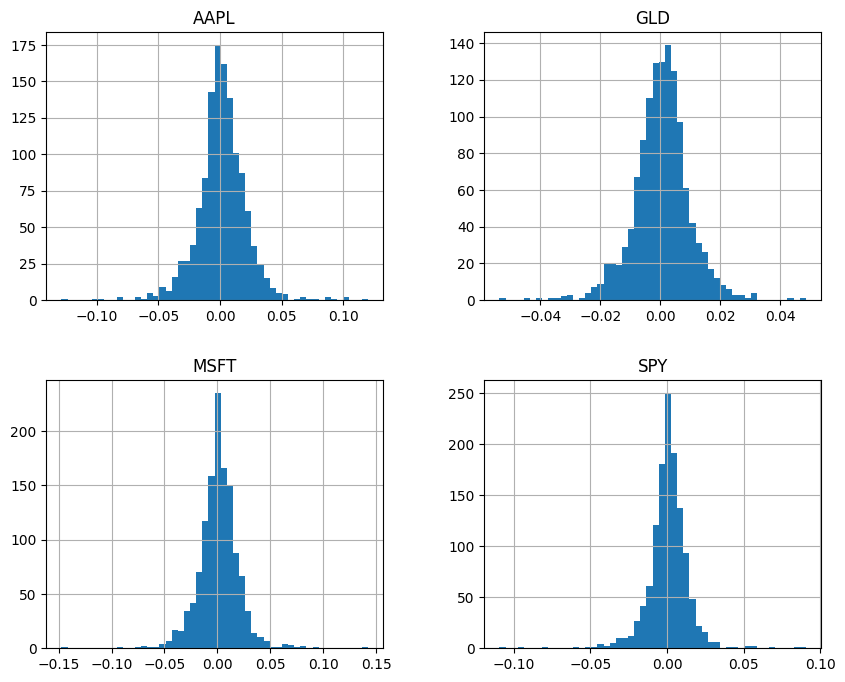

In [18]:
rentabilidad.hist(bins=50, figsize=(10, 8))
plt.show()

But... do the returns follow a normal distribution?

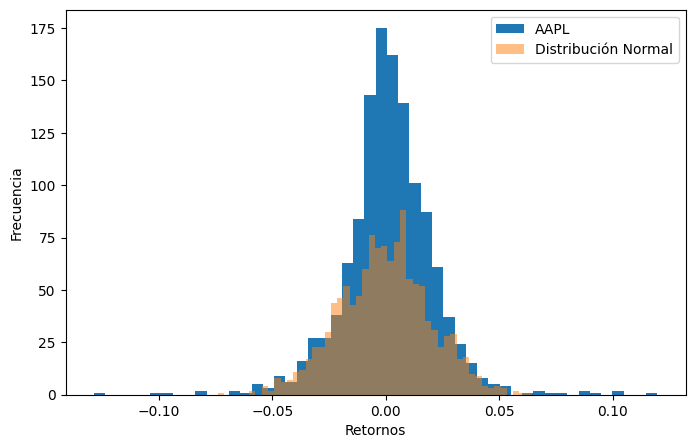

In [172]:
# Importamos el módulo de Numpy de generación de números aleatorios.
from numpy import random

# Creamos el generador de números aleatorios por defecto.
rng = random.default_rng(seed=42)

# Generamos la misma cantidad de números aleatorios que datos tenemos de retornos.
# Centrada en cero (parámetro "loc") y con la desviación estándar de los retornos de AAPL (parámetro "scale").
aleatorios_normal = rng.normal(loc=0, scale=rentabilidad.loc[:, "AAPL"].std(), size=len(rentabilidad))

# Graficamos el histograma de los retornos y los números aleatorios.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(rentabilidad.loc[:, "AAPL"], bins=50, label="AAPL")
plt.hist(aleatorios_normal, bins=50, alpha=0.5, label="Distribución Normal")
plt.legend()
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.show()

### **SKEWNESS**

The third moment of a distribution function measures its level of skewness. Thus:

* A positive skewness indicates that the stock has a higher probability above the mean.

* A negative skewness indicates that the stock has a higher probability below the mean.

* A neutral skewness indicates that the stock has a balanced probability on both sides of the mean.

<center>
    <img src="../imgs/skewness.PNG"  alt="drawing" width="600">
</center>

Let us look at the skewness of the returns of the assets we hold. If the returns follow a normal distribution, the skewness should be 0.

In [23]:
df_skew = rentabilidad.skew()
df_skew


Ticker
AAPL   -0.045084
GLD    -0.227455
MSFT   -0.003379
SPY    -0.553181
dtype: float64

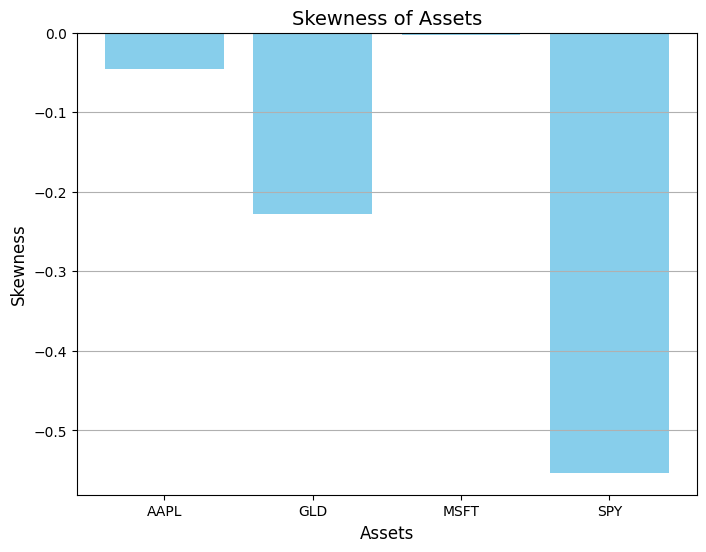

In [27]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_skew.index, df_skew, color='skyblue')

# Adding labels and title
plt.title("Skewness of Assets", fontsize=14)
plt.xlabel("Assets", fontsize=12)
plt.ylabel("Skewness", fontsize=12)
plt.grid(axis='y')

# Show the plot
plt.show()

We can observe that, for the most part, assets with negative asymmetries predominate. This means that, in general, the left tail is heavier than the right tail. That is, extreme negative events are more likely to occur than extreme positive ones.

### **KURTOSIS**

Kurtosis, in statistics, is a measure that describes the shape of the data distribution, specifically how ‘heavy’ or ‘light’ the tails of the distribution are compared to a normal (Gaussian bell) distribution. Here is an intuitive way to explain it:
 
Imagine you have two mountains made of sand. The first mountain is broad and low, extending gently sideways. The second mountain is taller and more pointed, with steeper sides. Both mountains may have the same amount of sand, but they are distributed differently.
 
- **Low kurtosis (Platicurtic)**: This is like the first mountain, flatter and more spread out. This means that the data are more spread out, there is less concentration of data near the average and the tails are ‘lighter’. In this distribution, extreme events (far away from the average) are less common.
 
- **High Kurtosis (Leptokurtic)**: This is like the second mountain, higher and narrower. Here, the data are more concentrated near the average and the tails are ‘heavier’. This implies that there is a higher probability of finding extreme values.
 
- **Normal kurtosis (Mesokurtic)**: This is similar to the normal distribution, neither too flat nor too sharp. It represents a balance between the dispersion of the data and the frequency of extreme events.

The interpretation of the kurtosis of a stock's returns is as follows:

* A kurtosis **equal to 0** indicates that the returns follow a **normal distribution**.

* A kurtosis **greater than 0** indicates that the stock has a **higher probability of generating extreme returns**, either positive or negative.

* A kurtosis **less than 0** indicates that the stock has a **lower probability of generating extreme returns**.

In [28]:
df_kurto = rentabilidad.kurtosis()
df_kurto

Ticker
AAPL     5.257068
GLD      2.996441
MSFT     7.088182
SPY     11.563540
dtype: float64

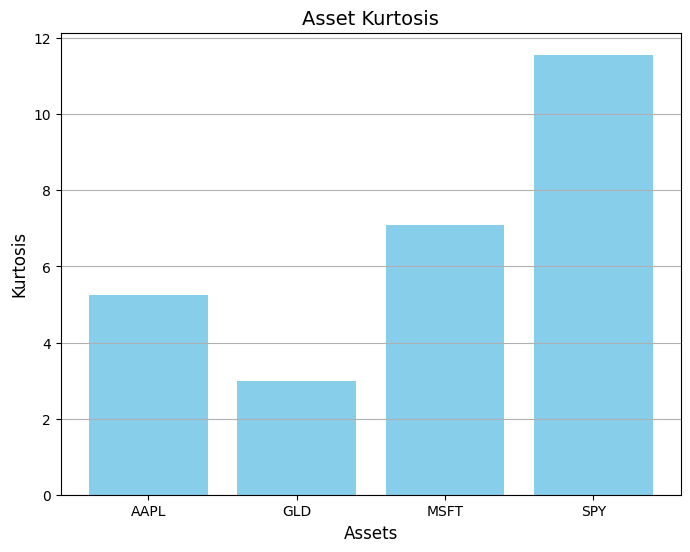

In [30]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_kurto.index, df_kurto, color='skyblue')

# Adding labels and title
plt.title("Asset Kurtosis", fontsize=14)
plt.xlabel("Assets", fontsize=12)
plt.ylabel("Kurtosis", fontsize=12)
plt.grid(axis='y')

# Show the plot
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">
Objective:
Analyze four financial assets, comparing their returns, volatility, and distribution characteristics to make an investment recommendation.

#### Instructions:
1- **Download Financial Data:**

Download the adjusted close prices for the following four assets:
Apple Inc. (AAPL), Microsoft Corporation (MSFT), Google (GOOGL) nad iShares 20+ Year Treasury Bond ETF (TLT)

Download the data from January 1, 2018, to December 31, 2023.

2-**Returns Calculation:**

Calculate the returns for each asset.
Store the returns for all assets in a DataFrame.

3- **Distribution of Returns:**

Plot the distribution (histogram) of returns for each asset in a single figure with four subplots.
Annual Return and Volatility:

Calculate the annualized return and volatility for each asset.
Plot the annualized return and volatility on a scatter plot.
Skewness and Kurtosis:

Calculate the skewness and kurtosis for each asset’s returns.
Visualize the skewness and kurtosis for each asset using a bar chart.
Analysis and Investment Decision:

4- **Assets analysis**

Analyze the returns, annualized return, volatility, skewness, and kurtosis for each asset.
Compare the assets and decide which asset you would recommend for investment, providing a clear explanation of your reasoning.

<div style="background-color: #e0f7fa; padding: 10px;">

**1- Download Financial Data:**

Download the adjusted close prices for the following four assets:
Apple Inc. (AAPL), Microsoft Corporation (MSFT), Google (GOOGL) nad iShares 20+ Year Treasury Bond ETF (TLT)

Download the data from January 1, 2018, to December 31, 2023.

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 1. Download Financial Data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TLT']
start_date = '2018-01-01'
end_date = '2023-12-31'

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# 2. Returns Calculation (Log Returns)
returns = np.log(data).diff().dropna()

[*********************100%***********************]  4 of 4 completed


<div style="background-color: #e0f7fa; padding: 10px;">

**3- Distribution of Returns:**

Plot the distribution (histogram) of returns for each asset in a single figure with four subplots.
Annual Return and Volatility:

Calculate the annualized return and volatility for each asset.
Plot the annualized return and volatility on a scatter plot.
Skewness and Kurtosis:

Calculate the skewness and kurtosis for each asset’s returns.
Visualize the skewness and kurtosis for each asset using a bar chart.
Analysis and Investment Decision:

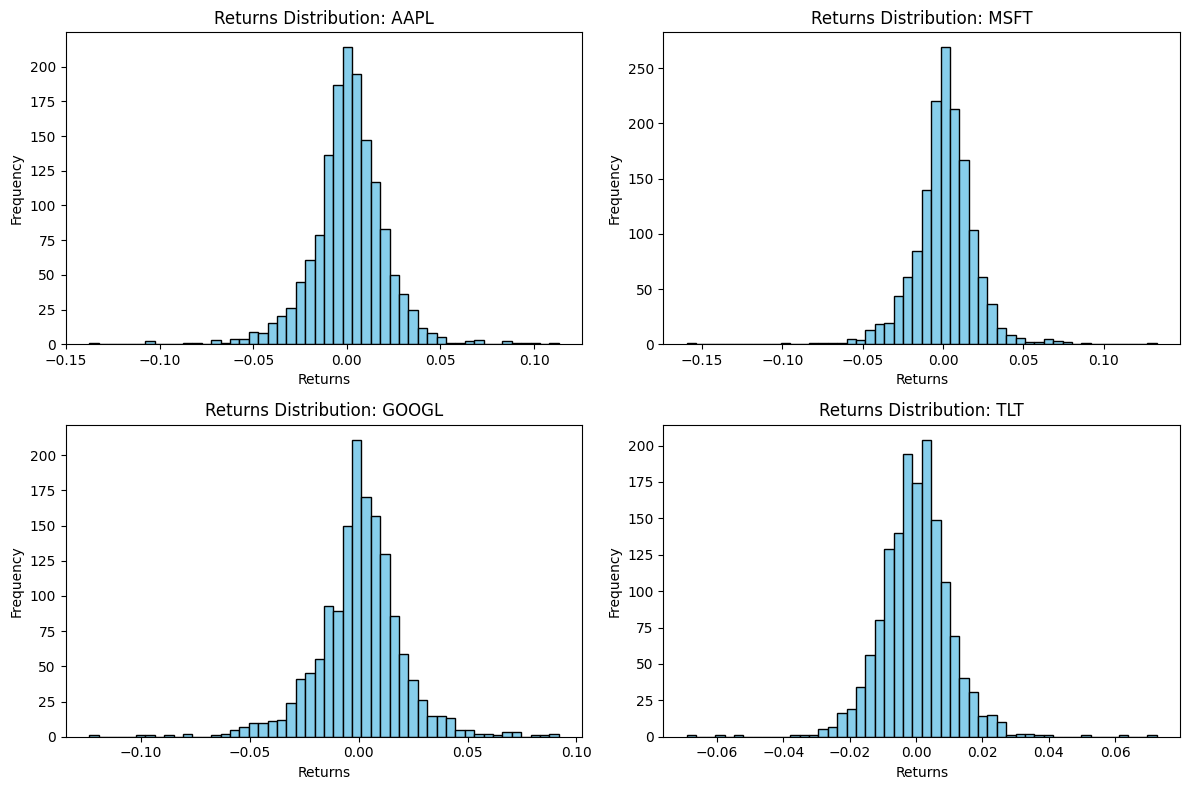

In [14]:
# 3. Distribution of Returns
plt.figure(figsize=(12, 8))
for i, ticker in enumerate(tickers):
    plt.subplot(2, 2, i+1)
    plt.hist(returns[ticker], bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Returns Distribution: {ticker}")
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:

# 4. Annual Return and Volatility Calculation
annual_returns = ((1 + returns.mean()) ** 252) - 1
annual_volatility = returns.std() * np.sqrt(252)

/tmp/ipykernel_743/3153376475.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(annual_returns[i], annual_volatility[i], ticker)


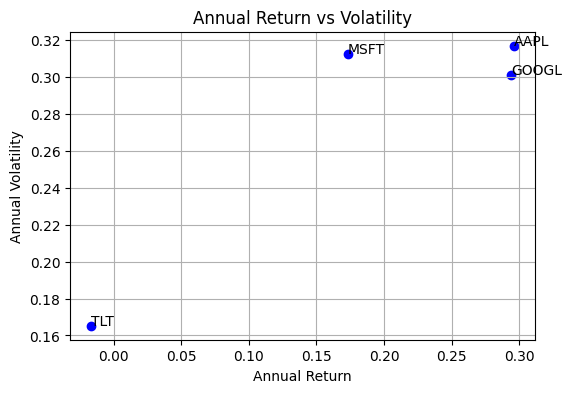

In [17]:
# Plot Annual Return vs Volatility
plt.figure(figsize=(6, 4))
plt.scatter(annual_returns, annual_volatility, color='b')
plt.title('Annual Return vs Volatility')
for i, ticker in enumerate(tickers):
    plt.text(annual_returns[i], annual_volatility[i], ticker)
plt.xlabel('Annual Return')
plt.ylabel('Annual Volatility')
plt.grid(True)
plt.show()

In [18]:
# 5. Skewness and Kurtosis
skewness = returns.skew()
kurtosis_values = returns.kurtosis()

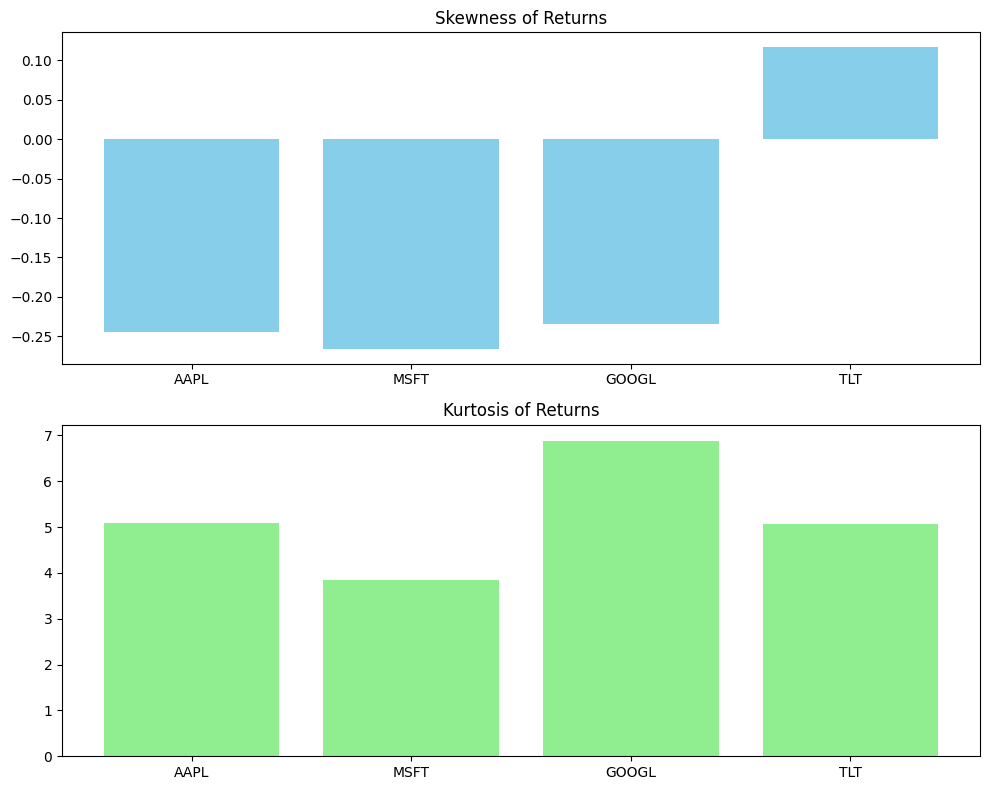

In [19]:
# Plot Skewness and Kurtosis
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Skewness
ax[0].bar(tickers, skewness, color='skyblue')
ax[0].set_title('Skewness of Returns')

# Kurtosis
ax[1].bar(tickers, kurtosis_values, color='lightgreen')
ax[1].set_title('Kurtosis of Returns')

plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

**4- Compare the assets and decide which asset you would recommend for investment, providing a clear explanation of your reasoning.**